In [9]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from screening.scripts.dataset import collect_features, collect_properties

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from bson import ObjectId

from sklearn.model_selection import train_test_split

In [2]:
database='dichalcogenides'

In [3]:
features = collect_features(database).set_index("_id")
target = collect_properties(database).set_index("_id")

In [4]:
property_ = 'energy_per_atom'

In [5]:
df = features.join(target[property_])
supervised = df[df[property_].notna()]
unsupervised = df[df[property_].isna()].drop([property_], axis = 1)
x = supervised.drop([property_], axis=1)
y = supervised[property_]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [12]:
model_cpu = CatBoostRegressor(iterations=2000, loss_function='MAE',
                              verbose=500, random_seed=0)
model_cpu.fit(x_train, y_train)
cpu_pred = model_cpu.predict(x_test)
cpu_mae = mean_absolute_error(cpu_pred, y_test)

0:	learn: 0.3032513	total: 429ms	remaining: 14m 16s
500:	learn: 0.0014099	total: 1m 32s	remaining: 4m 36s
1000:	learn: 0.0007684	total: 2m 53s	remaining: 2m 53s
1500:	learn: 0.0005258	total: 4m 13s	remaining: 1m 24s
1999:	learn: 0.0004213	total: 5m 32s	remaining: 0us


In [24]:
model_gpu = CatBoostRegressor(iterations=2000, loss_function='MAE', task_type="GPU", #devices=10,
                               verbose=500, random_seed=0)
model_gpu.fit(x_train, y_train)
gpu_pred = model_gpu.predict(x_test)
gpu_mae = mean_absolute_error(gpu_pred, y_test)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Warning: less than 75% gpu memory available for training. Free: 20799.5 Total: 32510.5


0:	learn: 0.3036755	total: 852ms	remaining: 28m 22s
500:	learn: 0.0015039	total: 5m 53s	remaining: 17m 38s
1000:	learn: 0.0010193	total: 10m 37s	remaining: 10m 36s
1500:	learn: 0.0008181	total: 15m 13s	remaining: 5m 3s
1999:	learn: 0.0006988	total: 20m 27s	remaining: 0us


In [28]:
model_gpu_b = CatBoostRegressor(iterations=2000, loss_function='MAE', task_type="GPU",  bootstrap_type='Bernoulli',
                               verbose=500, random_seed=0)
model_gpu_b.fit(x_train, y_train)
gpu_b_pred = model_gpu_b.predict(x_test)
gpu_b_mae = mean_absolute_error(gpu_b_pred, y_test)

0:	learn: 0.3036709	total: 451ms	remaining: 15m 1s
500:	learn: 0.0015194	total: 3m 15s	remaining: 9m 44s
1000:	learn: 0.0009630	total: 6m 38s	remaining: 6m 38s
1500:	learn: 0.0007544	total: 10m 1s	remaining: 3m 20s
1999:	learn: 0.0006429	total: 13m 17s	remaining: 0us


In [15]:
from matplotlib import pyplot as plt

<BarContainer object of 3 artists>

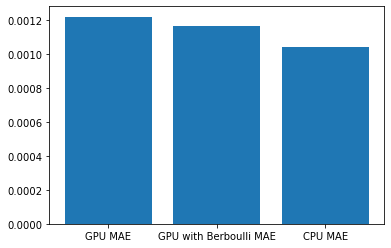

In [30]:
plt.bar(["GPU MAE", "GPU with Berboulli MAE", "CPU MAE",], [gpu_mae, gpu_b_mae, cpu_mae])